In [1]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
import keras

In [2]:
(x_train, y_train), (x_test,y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
print('Training images: {}'.format(x_train.shape))
print('Testing images: {}'.format(x_test.shape))

Training images: (50000, 32, 32, 3)
Testing images: (10000, 32, 32, 3)


In [4]:
print(x_train[0].shape)

(32, 32, 3)


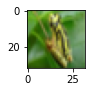

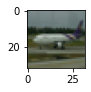

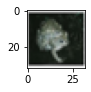

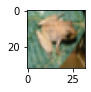

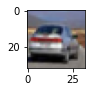

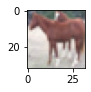

In [5]:
for i in range (232,238):
  plt.subplot(120+1+i)
  img = x_train[i]
  plt.imshow(img)
  plt.show()

Preprocessing the Data

In [6]:
x_train = x_train.reshape(x_train.shape[0], 32,32,3)
x_test = x_test.reshape(x_test.shape[0],32,32,3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255
x_test = x_test/2
n_classes = 10

print("Shape before one-hot encoding:", y_train.shape)
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", y_train.shape)

Shape before one-hot encoding: (50000, 1)
Shape after one-hot encoding:  (50000, 10)


Building the Model

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

model = Sequential()
# Convolutional layers
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32,32,3)))

model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

# Hidden Layer
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250,activation='relu'))
model.add(Dropout(0.3))

# Output Layer
model.add(Dense(10, activation='softmax'))

# Compiling
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Training
model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_test,y_test))

Epoch 1/20
391/391 [==============================] - 30s 49ms/step - loss: 1.6025 - accuracy: 0.4072 - val_loss: 1.3675 - val_accuracy: 0.5483
Epoch 2/20
391/391 [==============================] - 21s 54ms/step - loss: 1.1116 - accuracy: 0.6060 - val_loss: 1.2234 - val_accuracy: 0.5868
Epoch 3/20
391/391 [==============================] - 19s 48ms/step - loss: 0.9274 - accuracy: 0.6773 - val_loss: 1.0879 - val_accuracy: 0.6253
Epoch 4/20
391/391 [==============================] - 20s 52ms/step - loss: 0.8073 - accuracy: 0.7172 - val_loss: 0.9902 - val_accuracy: 0.6604
Epoch 5/20
391/391 [==============================] - 19s 50ms/step - loss: 0.7239 - accuracy: 0.7476 - val_loss: 0.9152 - val_accuracy: 0.6814
Epoch 6/20
391/391 [==============================] - 20s 51ms/step - loss: 0.6581 - accuracy: 0.7699 - val_loss: 0.8988 - val_accuracy: 0.6914
Epoch 7/20
391/391 [==============================] - 21s 54ms/step - loss: 0.6040 - accuracy: 0.7868 - val_loss: 0.8507 - val_accuracy:

Predicting

In [9]:
classes = range(0,10)

names = ['airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']

class_labels = dict(zip(classes, names))

batch = x_test[100:109]
labels = np.argmax(y_test[100:109], axis=-1)

predictions = model.predict(batch, verbose=1)

1/1 [==============================] - 0s 206ms/step


In [10]:
print(predictions)

[[3.44483342e-05 1.36238145e-06 2.14392826e-01 1.55151151e-02
  7.45539606e-01 2.10910868e-02 1.22702715e-03 2.13898090e-03
  5.66205345e-05 3.01442583e-06]
 [8.69029554e-06 8.99138513e-07 9.64455158e-02 2.36674696e-01
  4.76950780e-02 4.89250124e-01 1.28058746e-01 1.86280778e-03
  1.06095865e-06 2.39559313e-06]
 [3.27842997e-07 8.90473871e-07 2.59723514e-04 1.11296410e-02
  1.04933724e-05 5.36431465e-03 9.83232319e-01 7.76383672e-07
  1.13152817e-06 2.69500958e-07]
 [2.17071079e-06 6.38521769e-08 1.09228509e-04 9.89436984e-01
  6.80006994e-03 1.95039436e-03 1.62383204e-03 6.85320410e-05
  2.82299311e-06 5.88748435e-06]
 [5.00539499e-10 9.99910474e-01 1.81118000e-12 1.19190866e-12
  2.19703372e-14 2.35257370e-13 1.80504587e-11 2.27024515e-14
  2.61426180e-07 8.93069009e-05]
 [1.09254756e-07 9.99421716e-01 1.25046045e-08 1.13655663e-08
  2.34472747e-10 1.94113237e-09 6.43284537e-08 1.09393198e-11
  5.12239174e-04 6.58439531e-05]
 [5.84803410e-02 2.52731722e-02 3.12388211e-01 1.64114714e

In [11]:
for image in predictions:
  print(np.sum(image))

1.0000001
1.0000001
0.9999999
1.0
1.0
1.0
0.9999999
0.99999994
0.99999994


In [12]:
class_result = np.argmax(predictions,axis=-1)
print(class_result)

[4 5 6 3 1 1 2 6 6]


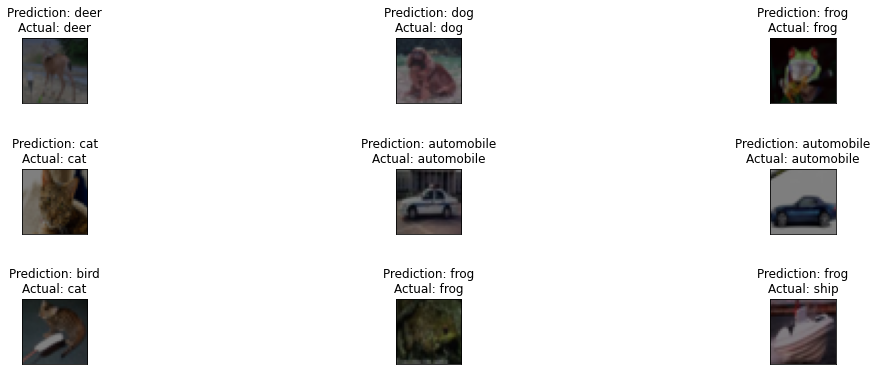

In [15]:
fig, axs = plt.subplots(3,3,figsize=(19,6))
fig.subplots_adjust(hspace=1)
axs=axs.flatten()

for i, img in enumerate(batch):
  for key, value in class_labels.items():
    if class_result[i]==key:
      title="Prediction: {}\nActual: {}".format(class_labels[key], class_labels[labels[i]])
      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(False)

  # Plot image
  axs[i].imshow(img)

# Show Plot
plt.show()